<h1 style="text-align: center;">Titanic Classification: Predicting Survival Likelihood</h1>

<h2 style="text-align: center;" >Step:1 Import necessary libraries</h2>

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# <h2 style="text-align: center;" >Step 2: Load the dataset</h2>

In [11]:
data = pd.read_csv('titanic.csv')

# <h2 style="text-align: center;">Step 3: Basic data exploration</h2>

In [16]:
print("First few rows of the dataset:\n", data.head())
print("\nSummary of the dataset:\n", data.info())
print("\nMissing values:\n", data.isnull().sum())

First few rows of the dataset:
    PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 

<h2 style="text-align: center;">Step 4: Drop columns less likely to influence survival directly</h2>

In [19]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

 <h2 style="text-align: center;" >Step 5: Fill missing values</h2>

In [26]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

 <h2 style="text-align: center;" >Step 6: Encode categorical variables</h2>

In [29]:
label_enc = LabelEncoder()
data['Sex'] = label_enc.fit_transform(data['Sex'])
data['Embarked'] = label_enc.fit_transform(data['Embarked'])

<h2 style="text-align: center;">Step 7: Define features and target</h2>

In [32]:
X = data.drop('Survived', axis=1)
y = data['Survived']

 <h2 style="text-align: center;">Step 8: Split data into train and test sets</h2>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 <h2 style="text-align: center;">Step 9: Standardize the data</h2>

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 <h2 style="text-align: center;">Step 10: Train the RandomForestClassifier model</h2>

In [43]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<h2 style="text-align: center;">Step 11: Make predictions</h2>

In [46]:
y_pred = model.predict(X_test)

<h2 style="text-align: center;">Step 12: Evaluate model performance</h2>

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Confusion Matrix:
 [[50  0]
 [ 0 34]]


<h2 style="text-align: center;">Step 13: Feature importance</h2>

In [52]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

<h2 style="text-align: center;">Step 14: Plot feature importance</h2>

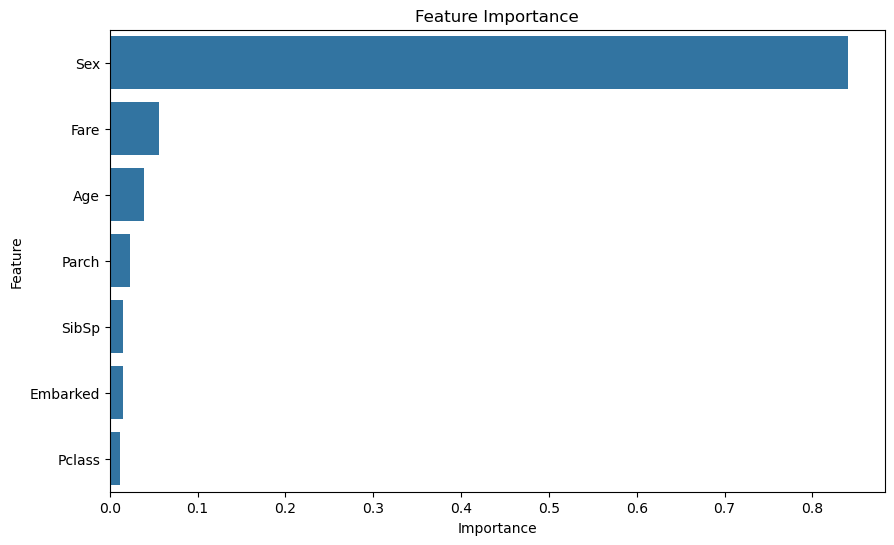

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
